# Digital Talent Scholarship 2020 
# Challenge 1 - Mcdonald's Menu
# Data Scientist D - Kelompok 2 :
1. Adinda Maharani - Teknik Elektro - 015192512011 
2. Garias Devara - Teknik Material - 015192512160
3. Johannes Silaban - Ilmu Geologi - 015192512155
4. Yunita - Teknik Informatika - 01519251201

Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

Import dataset:

In [2]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Identifikasi apakah ada missing data pada dataset:

In [4]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Berdasarkan referensi dari WHO dan Kementrian Kesehatan Republik Indonesia, didapatkan kebutuhan nutrisi dalam sehari seperti berikut:
1. Kalori = **2150 kkal**
2. Protein = **61 gr**
3. Gula = **50 gr**

Menghitung rekomendasi **Lemak**, **Karbohidrat**, dan **Garam** per hari berdasarkan dataset:

In [5]:
# Lemak
avg_fat = df['Total Fat'].mean(axis=0)
avg_daily_fat = df['Total Fat (% Daily Value)'].mean(axis=0)
rec_daily_fat = (100 * avg_fat) / avg_daily_fat
print('The Recommended Daily Fat is:', rec_daily_fat)

# Karbohidrat
avg_carb = df['Carbohydrates'].mean(axis=0)
avg_daily_carb = df['Carbohydrates (% Daily Value)'].mean(axis=0)
rec_daily_carb = (100 * avg_carb) / avg_daily_carb
print('The Recommended Daily Carbohydrates is:', rec_daily_carb)

# Garam
avg_sodium = df['Sodium'].mean(axis=0)
avg_daily_sodium = df['Sodium (% Daily Value)'].mean(axis=0)
rec_daily_sodium = (100 * avg_sodium) / avg_daily_sodium
print('The Recommended Daily Sodium is:', rec_daily_sodium)

The Recommended Daily Fat is: 64.93300423131171
The Recommended Daily Carbohydrates is: 300.0243724104314
The Recommended Daily Sodium is: 2397.600446428571


Sehingga, didapatkan kebutuhan nutrisi dalam sehari seperti berikut:
1. **Kalori** = **2150 kkal**
2. **Protein** = **61 gr**
3. **Gula** = **50 gr**
4. **Lemak** = **65 gr**
5. **Karbohidrat** = **300 gr**
6. **Garam** = **2000 mg**

Menampilkan data yang diperlukan dari dataset: 

In [6]:
df_calories = df.loc[:,['Item', 'Calories', 'Total Fat','Carbohydrates', 'Sugars', 'Protein', 'Sodium']]
df_calories.head()

,Item,Calories,Total Fat,Carbohydrates,Sugars,Protein,Sodium
0,Egg McMuffin,300,13.0,31,3,17,750
1,Egg White Delight,250,8.0,30,3,18,770
2,Sausage McMuffin,370,23.0,29,2,14,780
3,Sausage McMuffin with Egg,450,28.0,30,2,21,860
4,Sausage McMuffin with Egg Whites,400,23.0,30,2,21,880


In [7]:
df_calories.rename(columns = {'Total Fat':'Fat'}, inplace=True)
df_calories.head()

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium
0,Egg McMuffin,300,13.0,31,3,17,750
1,Egg White Delight,250,8.0,30,3,18,770
2,Sausage McMuffin,370,23.0,29,2,14,780
3,Sausage McMuffin with Egg,450,28.0,30,2,21,860
4,Sausage McMuffin with Egg Whites,400,23.0,30,2,21,880


Pembagian nutrisi per harinya sesuai anjuran WHO :
1. **Breakfast** = **30%**
2. **Lunch** = **50%**
3. **Dinner** = **20%**

# Breakfast

Menghitung kebutuhan nutrisi untuk breakfast:

In [11]:
Protein = 61 * 0.3
print('Kebutuhan Protein untuk Breakfast:', Protein)
Gula = 50 * 0.3
print('Kebutuhan Gula untuk Breakfast:', Gula)
Lemak = 65 * 0.3
print('Kebutuhan Lemak untuk Breakfast:', Lemak)
Karbohidrat = 300 * 0.3
print('Kebutuhan Karbohidrat untuk Breakfast:', Karbohidrat)
Garam = 2000 * 0.3
print('Kebutuhan Garam untuk Breakfast:', Garam)

Kebutuhan Protein untuk Breakfast: 18.3
Kebutuhan Gula untuk Breakfast: 15.0
Kebutuhan Lemak untuk Breakfast: 19.5
Kebutuhan Karbohidrat untuk Breakfast: 90.0
Kebutuhan Garam untuk Breakfast: 600.0


Menampilkan menu sesuai kebutuhan nutrisi untuk **breakfast**:

In [9]:
df_breakfast = df_calories[(df_calories.Fat <= 19.5) & (df_calories.Carbohydrates <= 90) & (df_calories.Sugars <= 15) & (df_calories.Protein <= 18.3) & (df_calories.Sodium <= 600)].copy(deep=True)
df_breakfast

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium
35,Hotcakes,350,9.0,60,14,8,590
38,Hash Brown,150,9.0,15,0,1,310
48,Hamburger,240,8.0,32,6,12,480
78,Chicken McNuggets (4 piece),190,12.0,12,0,9,360
79,Chicken McNuggets (6 piece),280,18.0,18,0,13,540
83,Filet-O-Fish,390,19.0,39,5,15,590
84,Premium Bacon Ranch Salad (without Chicken),140,7.0,10,4,9,300
87,Premium Southwest Salad (without Chicken),140,4.5,20,6,6,150
96,Small French Fries,230,11.0,30,0,2,130
97,Medium French Fries,340,16.0,44,0,4,190


Jumlah menu **breakfast** yang sesuai nutrisi:

In [10]:
df_breakfast.shape

(43, 7)

Plotting menu **breakfast** sesuai kalori:

In [12]:
def plot(grouped):
    item = grouped["Item"].sum()
    item_list = item.sort_index()
    item_list = item_list[-20:]
    plt.figure(figsize=(9,10))
    graph = sns.barplot(item_list.index,item_list.values)
    labels = [aj.get_text()[-40:] for aj in graph.get_yticklabels()]
    graph.set_yticklabels(labels)

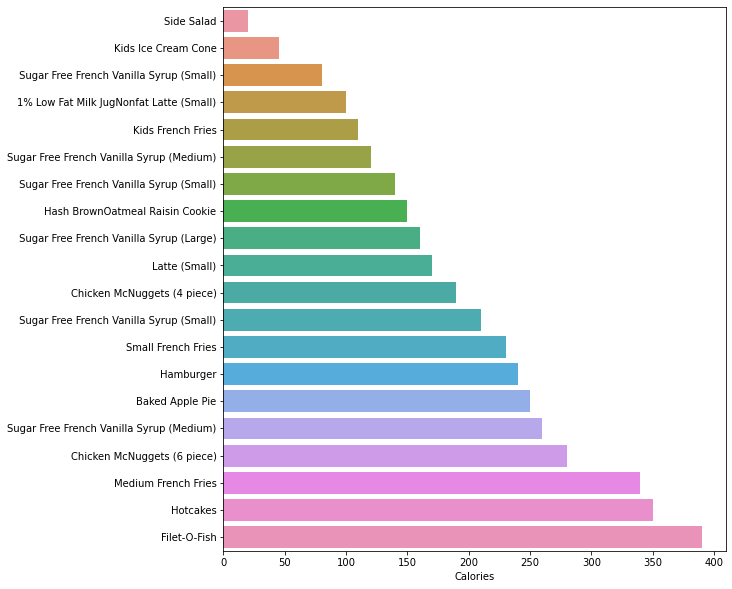

In [13]:
calories = df_breakfast.groupby(df_breakfast['Calories'])
plot(calories)

Binning menu **breakfast** sesuai kandungan kalori:

In [14]:
bins = np.linspace(min(df_breakfast['Calories']), max(df_breakfast['Calories']), 4)
group_names = ['Low', 'Moderate', 'High']
df_breakfast['caloriesBinned'] = pd.cut(df_breakfast['Calories'], bins, labels=group_names, include_lowest=True)
df_breakfast.head()

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium,caloriesBinned
35,Hotcakes,350,9.0,60,14,8,590,High
38,Hash Brown,150,9.0,15,0,1,310,Moderate
48,Hamburger,240,8.0,32,6,12,480,Moderate
78,Chicken McNuggets (4 piece),190,12.0,12,0,9,360,Moderate
79,Chicken McNuggets (6 piece),280,18.0,18,0,13,540,High


In [15]:
df_breakfast.caloriesBinned.value_counts()

Low         24
Moderate    15
High         4
Name: caloriesBinned, dtype: int64

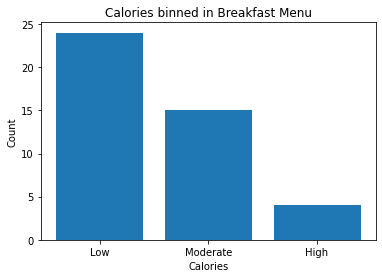

In [16]:
plt.bar(group_names, df_breakfast.caloriesBinned.value_counts())

plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Calories binned in Breakfast Menu')
plt.show()

# Lunch

Menghitung kebutuhan nutrisi untuk **lunch**:

In [17]:
Protein = 61 * 0.5
print('Kebutuhan Protein untuk Lunch:', Protein)
Gula = 50 * 0.5
print('Kebutuhan Gula untuk Lunch:', Gula)
Lemak = 65 * 0.5
print('Kebutuhan Lemak untuk Lunch:', Lemak)
Karbohidrat = 300 * 0.5
print('Kebutuhan Karbohidrat untuk Lunch:', Karbohidrat)
Garam = 2000 * 0.5
print('Kebutuhan Garam untuk Lunch:', Garam)

Kebutuhan Protein untuk Lunch: 30.5
Kebutuhan Gula untuk Lunch: 25.0
Kebutuhan Lemak untuk Lunch: 32.5
Kebutuhan Karbohidrat untuk Lunch: 150.0
Kebutuhan Garam untuk Lunch: 1000.0


Menampilkan menu sesuai kebutuhan nutrisi untuk **lunch**:

In [18]:
df_lunch = df_calories[(df_calories.Fat <= 32.5) & (df_calories.Carbohydrates <= 150) & (df_calories.Sugars <= 25) & (df_calories.Protein <= 30.5) & (df_calories.Sodium <= 1000)].copy(deep=True)
df_lunch

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium
0,Egg McMuffin,300,13.0,31,3,17,750
1,Egg White Delight,250,8.0,30,3,18,770
2,Sausage McMuffin,370,23.0,29,2,14,780
3,Sausage McMuffin with Egg,450,28.0,30,2,21,860
4,Sausage McMuffin with Egg Whites,400,23.0,30,2,21,880
...,...,...,...,...,...,...,...
202,Hazelnut Iced Coffee (Small),130,4.5,21,20,1,35
205,French Vanilla Iced Coffee (Small),120,4.5,20,19,1,40
208,Iced Coffee with Sugar Free French Vanilla Syr...,80,4.5,9,1,1,65
209,Iced Coffee with Sugar Free French Vanilla Syr...,120,7.0,12,2,1,90


Jumlah menu **lunch** yang sesuai nutrisi:

In [12]:
df_lunch.shape

(88, 7)

Plotting menu **lunch** sesuai kalori:

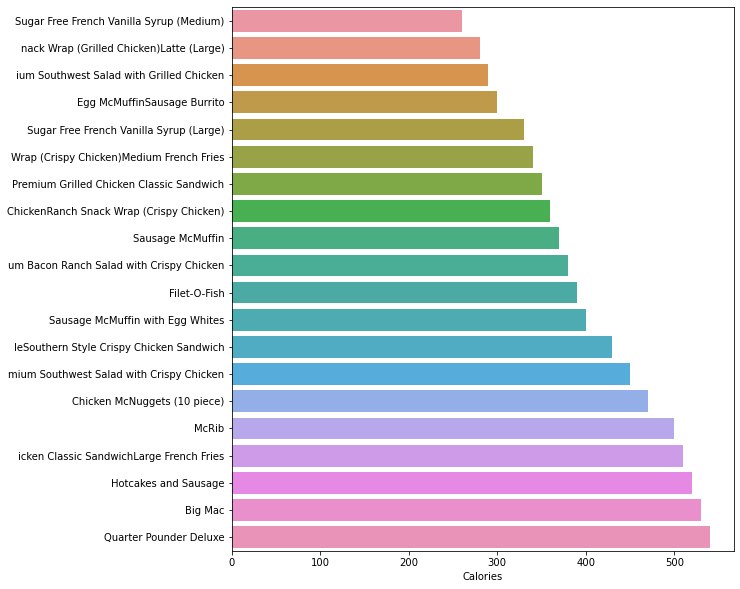

In [13]:
calories = df_lunch.groupby(df_lunch['Calories'])
plot(calories)

Binning menu **lunch** sesuai kandungan kalori:

In [14]:
bins = np.linspace(min(df_lunch['Calories']), max(df_lunch['Calories']), 4)
group_names = ['Low', 'Moderate', 'High']
df_lunch['caloriesBinned'] = pd.cut(df_lunch['Calories'], bins, labels=group_names, include_lowest=True)
df_lunch.head()

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium,caloriesBinned
0,Egg McMuffin,300,13.0,31,3,17,750,Moderate
1,Egg White Delight,250,8.0,30,3,18,770,Moderate
2,Sausage McMuffin,370,23.0,29,2,14,780,High
3,Sausage McMuffin with Egg,450,28.0,30,2,21,860,High
4,Sausage McMuffin with Egg Whites,400,23.0,30,2,21,880,High


In [15]:
df_lunch.caloriesBinned.value_counts()

Low         42
Moderate    29
High        17
Name: caloriesBinned, dtype: int64

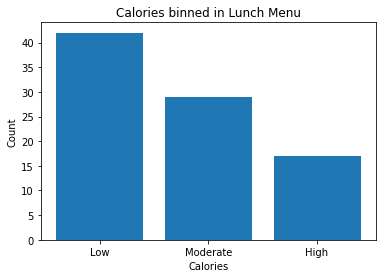

In [16]:
pyplot.bar(group_names, df_lunch.caloriesBinned.value_counts())
    
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Calories binned in Lunch Menu')
plt.show()

# Dinner

Menghitung kebutuhan nutrisi untuk **dinner**:

In [20]:
Protein = 61 * 0.2
print('Kebutuhan Protein untuk Dinner:', Protein)
Gula = 50 * 0.2
print('Kebutuhan Gula untuk Dinner:', Gula)
Lemak = 65 * 0.2
print('Kebutuhan Lemak untuk Dinner:', Lemak)
Karbohidrat = 300 * 0.2
print('Kebutuhan Karbohidrat untuk Dinner:', Karbohidrat)
Garam = 2000 * 0.2
print('Kebutuhan Garam untuk Dinner:', Garam)

Kebutuhan Protein untuk Dinner: 12.200000000000001
Kebutuhan Gula untuk Dinner: 10.0
Kebutuhan Lemak untuk Dinner: 13.0
Kebutuhan Karbohidrat untuk Dinner: 60.0
Kebutuhan Garam untuk Dinner: 400.0


In [19]:
df_dinner = df_calories[(df_calories.Fat <= 13) & (df_calories.Carbohydrates <= 60) & (df_calories.Sugars <= 20) & (df_calories.Protein <= 12.2) & (df_calories.Sodium <= 400)].copy(deep=True)
df_dinner

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium
38,Hash Brown,150,9.0,15,0,1,310
41,Fruit & Maple Oatmeal without Brown Sugar,260,4.0,49,18,5,115
78,Chicken McNuggets (4 piece),190,12.0,12,0,9,360
84,Premium Bacon Ranch Salad (without Chicken),140,7.0,10,4,9,300
87,Premium Southwest Salad (without Chicken),140,4.5,20,6,6,150
96,Small French Fries,230,11.0,30,0,2,130
99,Kids French Fries,110,5.0,15,0,1,65
100,Side Salad,20,0.0,4,2,1,10
101,Apple Slices,15,0.0,4,3,0,0
103,Baked Apple Pie,250,13.0,32,13,2,170


Jumlah menu **dinner** yang sesuai nutrisi:

In [18]:
df_dinner.shape

(44, 7)

Plotting menu **dinner** sesuai kalori:

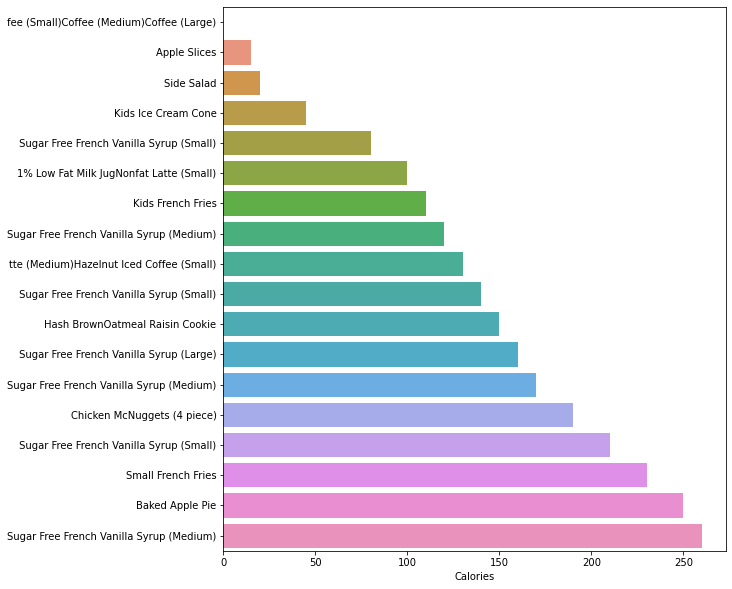

In [19]:
calories = df_dinner.groupby(df_dinner['Calories'])
plot(calories)

Binning menu **dinner** sesuai kandungan kalori:

In [20]:
bins = np.linspace(min(df_dinner['Calories']), max(df_dinner['Calories']), 4)
group_names = ['Low', 'Moderate', 'High']
df_dinner['caloriesBinned'] = pd.cut(df_dinner['Calories'], bins, labels=group_names, include_lowest=True)
df_dinner.head()

,Item,Calories,Fat,Carbohydrates,Sugars,Protein,Sodium,caloriesBinned
38,Hash Brown,150,9.0,15,0,1,310,Moderate
41,Fruit & Maple Oatmeal without Brown Sugar,260,4.0,49,18,5,115,High
78,Chicken McNuggets (4 piece),190,12.0,12,0,9,360,High
84,Premium Bacon Ranch Salad (without Chicken),140,7.0,10,4,9,300,Moderate
87,Premium Southwest Salad (without Chicken),140,4.5,20,6,6,150,Moderate


In [21]:
df_dinner.caloriesBinned.value_counts()

Low         21
Moderate    16
High         7
Name: caloriesBinned, dtype: int64

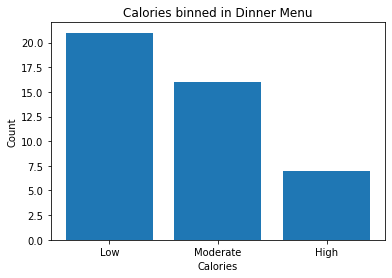

In [22]:
pyplot.bar(group_names, df_dinner.caloriesBinned.value_counts())

plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Calories binned in Dinner Menu')
plt.show()